In [1]:
import optuna
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# optuna 探索

optuna 使って関数の最小値探索の[ベンチマーク](https://en.wikipedia.org/wiki/Test_functions_for_optimization)をしてみる。

本日用意したのは、Levi function N.13, Bukin function N.6, Himmelblau's function, Easom function

## Levi function N.13

$f(x,y) = \sin^2(3\pi x)+(x+1)^2(1+\sin^2(3\pi y))+(y-1)^2(1+\sin^2(2\pi y))$

$f_{min}(1,1) = 0$

In [2]:
def levi(X):
    #X is a 2*N matrix, each column contains
    #x and y coordinates.
    x , y = X
    val = np.sin(3*np.pi*x)**2+ \
          (x-1)**2 * (1+np.sin(3*np.pi*y)**2)+ \
          (y-1)**2 * (1+np.sin(2*np.pi*y)**2)
    return val

In [3]:
n = 100
k = 10
X,Y = np.mgrid[-k:k:n*1j,-k:k:n*1j]
Z = levi(np.vstack((X.ravel(),Y.ravel()))).reshape(n,n)

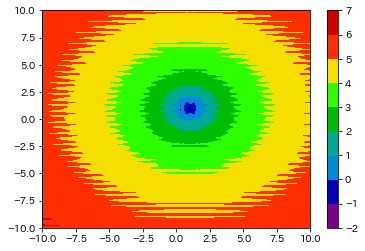

In [4]:
#plt.imshow(np.log(Z),cmap='jet',extent=(-k,k,-k,k),origin=0)#,cmap=plt.cm.hot_r)
plt.contourf(X,Y,np.log(Z),cmap='nipy_spectral')
plt.colorbar()
plt.show()

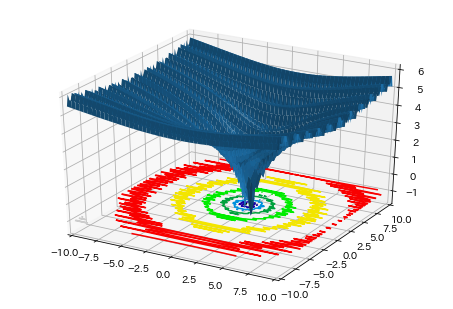

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
#ax.plot_wireframe(X,Y,np.log(Z))
ax.plot_surface(X, Y, np.log(Z))
cset = ax.contour(X, Y, np.log(Z), zdir='z', offset=-1, cmap='nipy_spectral')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

optuna使って書くと

In [6]:
def levi_objective(trial):
    x = trial.suggest_uniform('x',-10,10)
    y = trial.suggest_uniform('y',-10,10)
    return levi((x,y))

In [7]:
study = optuna.create_study()
study.optimize(levi_objective,n_trials=500)
clear_output()

In [8]:
print(study.best_params)

{'y': 0.9744940610462433, 'x': 0.9918895992449224}


In [9]:
df = study.trials_dataframe()

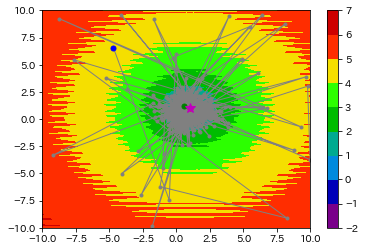

In [10]:
plt.contourf(X,Y,np.log(Z),cmap='nipy_spectral')
plt.colorbar()
plt.plot(df['params']['x'],df['params']['y'],'-',linewidth=1,color='gray',marker='.')
plt.plot(study.best_params['x'],study.best_params['y'],color='r',marker='o',markersize=5)
plt.plot(df['params']['x'][0],df['params']['y'][0],color='b',marker='o',markersize=5)
plt.plot(df['params']['x'][99],df['params']['y'][99],color='g',marker='o',markersize=5)
plt.plot(1,1,color='m',marker='*',markersize=10)
plt.show()

Trialと最小値の推移

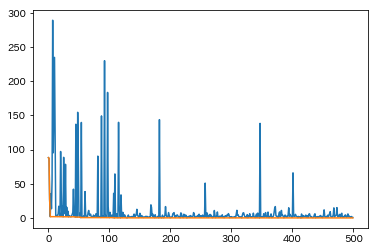

In [11]:
plt.plot([t.value for t in study.trials])
plt.plot(pd.DataFrame([t.value for t in study.trials]).cummin())
plt.show()

## Bukin function N.6

$f(x,y) = 100*\sqrt{|y-0.01x^2|}+0.01|x+10|$

$f_{min}(-10,1) = 0$

In [12]:
def bukin(X):
    #X is a 2*N matrix, each column contains
    #x and y coordinates.
    x , y = X
    val = 100*np.sqrt(np.abs(y-0.01*(x**2)))+0.01*np.abs(x+10)
    return val

In [13]:
n = 100
x = np.linspace(-15,-5,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = bukin(np.vstack((X.ravel(),Y.ravel()))).reshape(n,n)

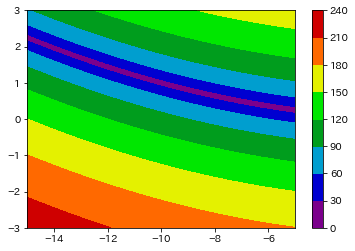

In [14]:
plt.contourf(X,Y,Z,cmap='nipy_spectral')
plt.colorbar()
plt.show()

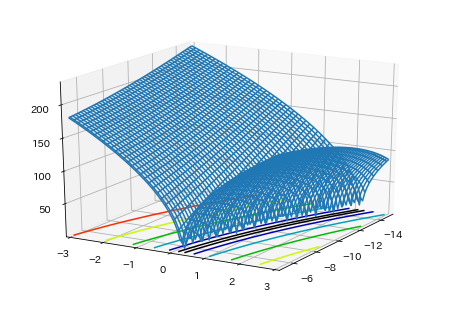

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(20,30)
#ax.plot_wireframe(X,Y,np.log(Z))
ax.plot_wireframe(X, Y, Z)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap='nipy_spectral')
plt.xlim([-15,-5])
plt.ylim([-3,3])
plt.show()

In [16]:
def bukin_objective(trial):
    x = trial.suggest_uniform('x',-15,-5)
    y = trial.suggest_uniform('y',-3,3)
    return bukin((x,y))

In [17]:
study = optuna.create_study()
study.optimize(bukin_objective,n_trials=500)
clear_output()

In [18]:
print(study.best_params)

{'y': 0.38179211670300145, 'x': -6.178603975660923}


In [19]:
df = study.trials_dataframe()

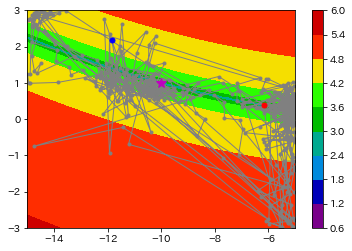

In [20]:
plt.contourf(X,Y,np.log(Z),cmap='nipy_spectral')
plt.colorbar()
plt.plot(df['params']['x'],df['params']['y'],'-',linewidth=1,color='gray',marker='.')
plt.plot(study.best_params['x'],study.best_params['y'],color='r',marker='o',markersize=5)
plt.plot(df['params']['x'][0],df['params']['y'][0],color='b',marker='o',markersize=5)
plt.plot(-10,1,color='m',marker='*',markersize=10)
plt.show()

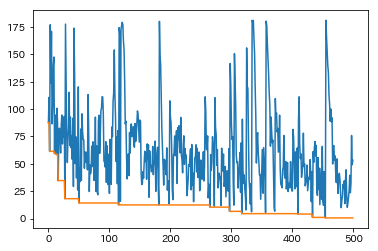

In [21]:
plt.plot([t.value for t in study.trials])
plt.plot(pd.DataFrame([t.value for t in study.trials]).cummin())
plt.show()

## Himmelblau's function

$f(x,y) = (x^2+y-11)^2 + (x+y^2 -7)^2$

${\rm Min} = \left \{ \begin{array}{l}
    f(3,2) = 0\\
    f(-2.805118,3.131312) = 0 \\
    f(-3.779310,-3.283186) = 0 \\
    f(3.584428,-1.848126) = 0
\end{array} \right.$

In [22]:
def Himmelblau(X):
    #X is a 2*N matrix, each column contains
    #x and y coordinates.
    x , y = X
    val = (x**2 + y -11)**2 + (x+y**2-7)**2
    return val

In [23]:
n = 100
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z = Himmelblau(np.vstack((X.ravel(),Y.ravel()))).reshape(n,n)

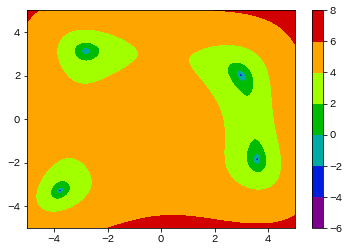

In [24]:
plt.contourf(X,Y,np.log(Z),cmap='nipy_spectral')
plt.colorbar()
plt.show()

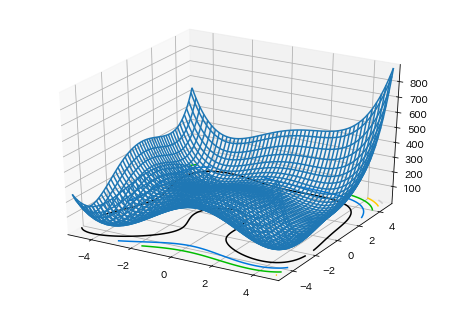

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.view_init(20,30)
#ax.plot_wireframe(X,Y,np.log(Z))
ax.plot_wireframe(X, Y, Z)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap='nipy_spectral')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

In [26]:
def Himmelblau_objective(trial):
    x = trial.suggest_uniform('x',-5,5)
    y = trial.suggest_uniform('y',-5,5)
    return Himmelblau((x,y))

In [27]:
study = optuna.create_study()
study.optimize(Himmelblau_objective,n_trials=500)
clear_output()

In [28]:
print(study.best_params)

{'y': -1.7268756516083756, 'x': 3.5405855210741293}


In [29]:
df = study.trials_dataframe()

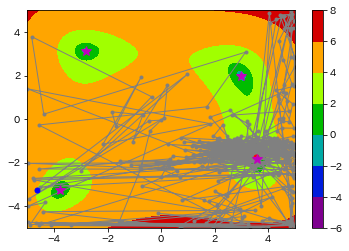

In [30]:
plt.contourf(X,Y,np.log(Z),cmap='nipy_spectral')
plt.colorbar()
plt.plot(df['params']['x'],df['params']['y'],'-',linewidth=1,color='gray',marker='.')
plt.plot(study.best_params['x'],study.best_params['y'],color='r',marker='o',markersize=5)
plt.plot(df['params']['x'][0],df['params']['y'][0],color='b',marker='o',markersize=5)
plt.plot([3,-2.805118,-3.779310,3.584428],[2,3.131312,-3.283186,-1.848126],color='m',marker='*',linestyle='none',markersize=10)
plt.show()

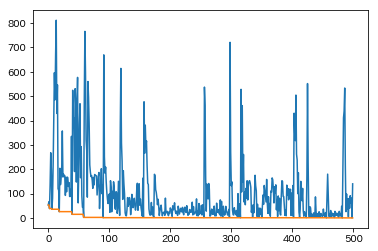

In [31]:
plt.plot([t.value for t in study.trials])
plt.plot(pd.DataFrame([t.value for t in study.trials]).cummin())
plt.show()

## Easom function

$f(x,y) = -\cos(x)\cos(y)\exp(-((x-\pi)^2+(y-\pi)^2))$

$f_{min}(\pi,\pi) = 0 $

In [32]:
def Easom(X):
    #X is a 2*N matrix, each column contains
    #x and y coordinates.
    x , y = X
    val = -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2 + (y-np.pi)**2))
    return val

In [33]:
n = 1000
x = np.linspace(-100,100,1000)
y = np.linspace(-100,100,1000)
X,Y = np.meshgrid(x,y)
Z = Easom(np.vstack((X.ravel(),Y.ravel()))).reshape(n,n)

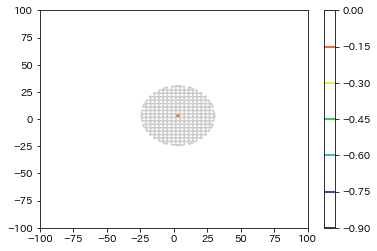

In [48]:
plt.contour(X,Y,Z,cmap='nipy_spectral')
plt.colorbar()
plt.show()

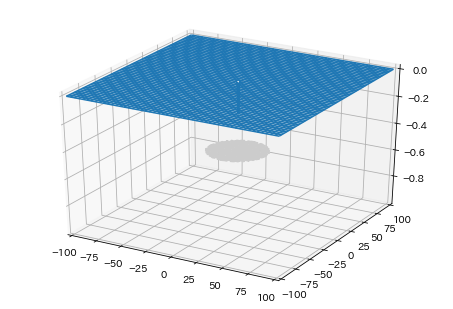

In [49]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.view_init(20,30)
#ax.plot_wireframe(X,Y,np.log(Z))
ax.plot_wireframe(X, Y, Z)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.5, cmap='nipy_spectral')
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.show()

In [50]:
def Easom_objective(trial):
    x = trial.suggest_uniform('x',-100,100)
    y = trial.suggest_uniform('y',-100,100)
    return Easom((x,y))

In [51]:
study = optuna.create_study()
study.optimize(Easom_objective,n_trials=500)
clear_output()

In [52]:
print(study.best_params)

{'y': 3.1411495990182776, 'x': 3.1306077110266264}


In [53]:
df = study.trials_dataframe()

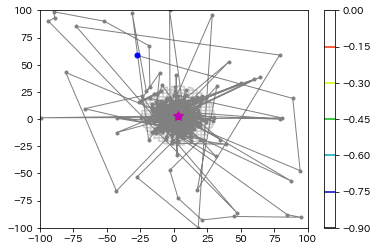

In [54]:
plt.contour(X,Y,Z,cmap='nipy_spectral')
plt.colorbar()
plt.plot(df['params']['x'],df['params']['y'],'-',linewidth=1,color='gray',marker='.')
plt.plot(study.best_params['x'],study.best_params['y'],color='r',marker='o',markersize=6)
plt.plot(df['params']['x'][0],df['params']['y'][0],color='b',marker='o',markersize=5)
plt.plot(np.pi,np.pi,color='m',marker='*',linestyle='none',markersize=10)
plt.show()

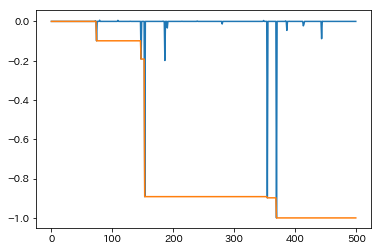

In [55]:
plt.plot([t.value for t in study.trials])
plt.plot(pd.DataFrame([t.value for t in study.trials]).cummin())
plt.show()